In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#DATA PREPROCESSING

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
#since theres no duplicates and null values , copying all numerical values to another dataframe to check skew and handle outliers
ndf = df.select_dtypes(include=['float64', 'int64'])
ndf.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

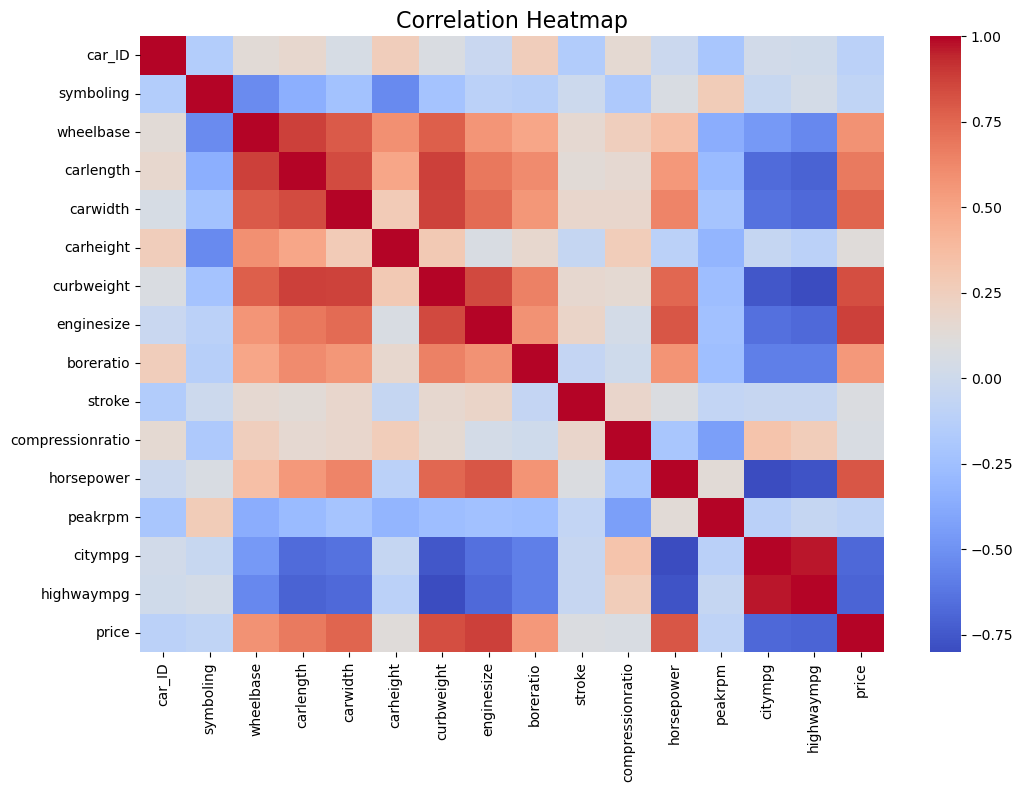

In [6]:
#finding the correleation between all to price, so that only important features are meant to be handled
corr=ndf.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [7]:
# Create a copy of the DataFrame to handle outliers
df_cleaned=df.copy()

# List of columns to handle outliers
columns=['price', 'horsepower', 'enginesize', 'wheelbase']
for col in columns:
    Q1=df_cleaned[col].quantile(0.25)
    Q3=df_cleaned[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1 - 0.5 * IQR #here im using 0.5 since, when i used 1.5 first the outliers in the'price' was still greaater than 1 so.
    upper_bound=Q3 + 0.5 * IQR
    df_cleaned=df_cleaned[(df_cleaned[col]>=lower_bound)&(df_cleaned[col]<=upper_bound)]

df_cleaned

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
19,20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295.0
20,21,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6575.0
21,22,1,dodge rampage,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572.0
22,23,1,dodge challenger se,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6377.0
23,24,1,dodge d200,gas,turbo,two,hatchback,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.60,102,5500,24,30,7957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,187,2,volkswagen 411 (sw),gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.00,85,5250,27,34,8495.0
187,188,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.00,68,4500,37,42,9495.0
188,189,2,volkswagen dasher,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.00,100,5500,26,32,9995.0
189,190,3,vw dasher,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.50,90,5500,24,29,11595.0


In [47]:
#checking skewness
ndf_cleaned=df_cleaned.select_dtypes(include=['float64', 'int64'])
ndf_cleaned.skew()

wheelbase     0.034932
carlength    -0.289074
carwidth      0.219950
curbweight    1.044652
enginesize    0.878253
boreratio     1.006943
horsepower    0.820291
citympg       0.736427
highwaympg    0.518612
price         0.606732
dtype: float64

In [9]:
df_cleaned.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
#since car_ID and carname is irrelevant to prediction of the price it is best to drop and copy the values to a different dataframe for future references
# Keep a copy of the identifiers
identifiers=df_cleaned[['car_ID', 'CarName']].copy()

# Now drop the identifier columns from df_cleaned for model training
df_cleaned=df_cleaned.drop(['car_ID', 'CarName'], axis=1)

#Feature Importance Analysis 

In [12]:
df_cleaned.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [13]:
#From the above list of columns and finding out the least correlated or negatively correlated columns to 'price' must be dropped since it leads to overfitting and unecessary to training the models
#looking at the heatmap 'symboling', 'peakrpm', 'compressionratio', 'stroke', 'carheight' seems to be less related to price but citympg and highwaympg is not dropped because mileage of the vehicle is important so considering that fact
# Drop the specified columns
df_cleaned=df_cleaned.drop(['symboling', 'peakrpm', 'compressionratio', 'stroke', 'carheight'],axis=1)

# Verify by printing the remaining columns
print("Remaining columns:", df_cleaned.columns.tolist())

Remaining columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']


In [14]:
df_cleaned

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
19,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,1874,ohc,four,90,2bbl,3.03,70,38,43,6295.0
20,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,1909,ohc,four,90,2bbl,3.03,70,38,43,6575.0
21,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,1876,ohc,four,90,2bbl,2.97,68,37,41,5572.0
22,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,1876,ohc,four,90,2bbl,2.97,68,31,38,6377.0
23,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,2128,ohc,four,98,mpfi,3.03,102,24,30,7957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,2275,ohc,four,109,mpfi,3.19,85,27,34,8495.0
187,diesel,turbo,four,sedan,fwd,front,97.3,171.7,65.5,2319,ohc,four,97,idi,3.01,68,37,42,9495.0
188,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,2300,ohc,four,109,mpfi,3.19,100,26,32,9995.0
189,gas,std,two,convertible,fwd,front,94.5,159.3,64.2,2254,ohc,four,109,mpfi,3.19,90,24,29,11595.0


#Model Implementation

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Convert Categorical Variables into Numerical (one-hot label method)
df_cleaned=pd.get_dummies(df_cleaned)

# Separate Features and Target
X=df_cleaned.drop('price', axis=1)
y=df_cleaned['price']

# Standardize the Features
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42)
df_cleaned

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype_dohc,enginetype_ohc,enginetype_ohcf,cylindernumber_four,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
19,94.5,155.9,63.6,1874,90,3.03,70,38,43,6295.0,...,False,True,False,True,False,True,False,False,False,False
20,94.5,158.8,63.6,1909,90,3.03,70,38,43,6575.0,...,False,True,False,True,False,True,False,False,False,False
21,93.7,157.3,63.8,1876,90,2.97,68,37,41,5572.0,...,False,True,False,True,False,True,False,False,False,False
22,93.7,157.3,63.8,1876,90,2.97,68,31,38,6377.0,...,False,True,False,True,False,True,False,False,False,False
23,93.7,157.3,63.8,2128,98,3.03,102,24,30,7957.0,...,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,97.3,171.7,65.5,2275,109,3.19,85,27,34,8495.0,...,False,True,False,True,False,False,False,True,False,False
187,97.3,171.7,65.5,2319,97,3.01,68,37,42,9495.0,...,False,True,False,True,False,False,True,False,False,False
188,97.3,171.7,65.5,2300,109,3.19,100,26,32,9995.0,...,False,True,False,True,False,False,False,True,False,False
189,94.5,159.3,64.2,2254,109,3.19,90,24,29,11595.0,...,False,True,False,True,False,False,False,True,False,False


In [49]:
#linear Regression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
r2lr=r2_score(y_test, y_pred_lr)
mselr=mean_squared_error(y_test, y_pred_lr)
maelr=mean_absolute_error(y_test, y_pred_lr)

In [51]:
#Decision tree 
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
r2dt=r2_score(y_test, y_pred_dt)
msedt=mean_squared_error(y_test, y_pred_dt)
maedt=mean_absolute_error(y_test, y_pred_dt)

In [53]:
#Random fores reegressor
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
r2rf=r2_score(y_test, y_pred_rf)
mserf=mean_squared_error(y_test, y_pred_rf)
maerf=mean_absolute_error(y_test, y_pred_rf)

In [57]:
#Gradient booster Regressor
gb=GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
r2gb=r2_score(y_test, y_pred_gb)
msegb=mean_squared_error(y_test, y_pred_gb)
maegb=mean_absolute_error(y_test, y_pred_gb)

In [55]:
#Support vector regressor
svr=SVR()
svr.fit(X_train, y_train)
y_pred_svr=svr.predict(X_test)
r2svr=r2_score(y_test, y_pred_svr)
msesvr=mean_squared_error(y_test, y_pred_svr)
maesvr=mean_absolute_error(y_test, y_pred_svr)

#Model Evaluation


In [23]:
#comparing all the output of the algorithms used to compare and select the better of all of them
eval= {
    'Linear Regression': {'R2': r2lr, 'MSE': mselr, 'MAE': maelr},
    'Decision Tree Regressor': {'R2': r2dt, 'MSE': msedt, 'MAE': maedt},
    'Random Forest Regressor': {'R2': r2rf, 'MSE': mserf, 'MAE': maerf},
    'Gradient Boosting Regressor': {'R2': r2gb, 'MSE': msegb, 'MAE': maegb},
    'Support Vector Regressor': {'R2': r2svr, 'MSE': msesvr, 'MAE': maesvr}
}
dfeval = pd.DataFrame(eval).T
print(dfeval)
#After comparing, Random forest method produced best result since the R-squared showed the highsest and MSE and MAE showed less which tells less error comparing actual and predicted values

                                   R2           MSE          MAE
Linear Regression            0.798982  6.394876e+05   678.533698
Decision Tree Regressor      0.642917  1.135966e+06   817.105263
Random Forest Regressor      0.840385  5.077721e+05   572.162702
Gradient Boosting Regressor  0.801782  6.305783e+05   662.926204
Support Vector Regressor    -0.045164  3.324916e+06  1520.666354


Hyperparameter Tuning 

In [25]:
#performing hyperparameter tuning to gradient boosting regressor method ,since comparing with all other methods Gradient booster regressor performs better next to random forest method
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gb_model = GradientBoostingRegressor(random_state=42)
param_grid = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0]
}
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best R² Score: 0.43116281550348184


In [61]:
#SO i can conclude that from all the prediction models Random forest produced the best and 'price', 'horsepower', 'enginesize', 'wheelbase', 'curbweight', 'citympg', 'highwaympg' showed the best features for finding the price